# Сборный проект. Анализ продаж компьютерных игр

# Введение

## Описание проекта

Перед нами данные до 2016 года и мы планируете кампанию на 2017-й.

 В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая\
 возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию,\
 например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План работы

### Импортируем необходимые нам библиотеки

### Откроем файл с данными и изучим общую информацию

### Подготовим данные

• Заменим названия столбцов (приведём к нижнему регистру);

• Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

 • Обработаем пропуски при необходимости

• Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Проведем исследовательский анализ данных

• Посмотрим, сколько игр выпускалось в разные годы.

• Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими\
суммарными продажами и построим распределение по годам.

• Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно\
в результате исследования предыдущих вопросов.

• Выберем несколько потенциально прибыльных платформ.

• Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

• Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим\
диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.


• Соотнесем выводы с продажами игр на других платформах.

• Посмотрим на общее распределение игр по жанрам.

### Составим портрет пользователя каждого региона

• Определим для пользователя каждого региона (NA, EU, JP):

***
1. Самые популярные платформы (топ-5).
2. Самые популярные жанры (топ-5).
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
***

### Проверим гипотезы

***
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
***

• Зададим самостоятельно пороговое значение alpha.

• Поясним:

***
1. Как мы сформулировали нулевую и альтернативную гипотезы;
2. Какой критерий применили для проверки гипотез и почему.
***

### Напишем общий вывод

## Описание данных

***
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
***

## Начало работы

 ### Импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

### Подготовка данных

#### Откроем файл с данными и изучим общую информацию

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
display(df_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**\
В таблице, которая содержит информацию по продаже игр в разных регионах и рейтинги, 16714 записей.\
Для упрощения работы с таблицей нам необходимо изменить регистр названий столбцов, изменить тип данных некоторых из них и удалить пропуски.

#### Приведем названия столбцов к нижнему регистру

In [6]:
df_games.columns = df_games.columns.str.lower()

#### Найдем пропущенные значения в каждом столбце

In [7]:
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

2 пропущенных значения в столбце 'name', 2 пропущенных значения в столбце 'genre' и несколько тысяч пропусков в столбцах с оценками и возрастным рейтингом.

Сразу удалим 2 пропущенных значения 

#### Предобработаем данные

**Предобработаем данные в столбце 'critic_score'**

Найдем уникальные значения.

In [8]:
df_games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Заменим пропуски на -1.

In [9]:
df_games['critic_score'] = df_games['critic_score'].fillna(-1)

Преобразуем данные в тип int

In [10]:
df_games['critic_score'] = df_games['critic_score'].astype('Int64')

In [11]:
display(df_games['critic_score'])

0        76
1        -1
2        82
3        80
4        -1
         ..
16710    -1
16711    -1
16712    -1
16713    -1
16714    -1
Name: critic_score, Length: 16715, dtype: Int64

**Предобработаем данные в столбце 'user_score'**

Найдем уникальные значения.

In [12]:
df_games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В уникальных значениях обращаем внимание на значение 'tbd', ответы mail.ru подсказали, что это аббревиатура to be determined, что в переводе "предстоит определить". Значит этих данных нет, они еще не определены, что означает, что пользователи, скорее всего, поставили оценку, но по какой-то причине она еще не обработана или не выгружена. Но так как оценки нет, то приравниваем это значение к NaN.

In [13]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.NaN)

После чего заменим пропуски значением -1.

In [14]:
df_games['user_score'] = df_games['user_score'].fillna(-1)

И преобразуем в тип данных float

In [15]:
df_games['user_score'] = df_games['user_score'].astype('float')

In [16]:
display(df_games['user_score'])

0        8.0
1       -1.0
2        8.3
3        8.0
4       -1.0
        ... 
16710   -1.0
16711   -1.0
16712   -1.0
16713   -1.0
16714   -1.0
Name: user_score, Length: 16715, dtype: float64

**Предобработаем данные в столбце 'year_of_release'**

Найдем уникальные значения.

In [17]:
df_games['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

И пропуски в данных.

In [18]:
df_games['year_of_release'].isna().sum()

269

269 пропущенных значения. Количество пропусков невелико, поэтому мы можем удалить эти строки. Заодно удалим пропуски в столбцах name и genre.

In [19]:
df_games = df_games.dropna(subset=['name', 'year_of_release', 'genre'])

И преобразуем в тип данных float.

In [20]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

In [21]:
display(df_games['year_of_release'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: Int64

**Заменим пропуски в столбце 'rating' на uncnown**

In [22]:
df_games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [23]:
df_games['rating'] = df_games['rating'].fillna('uncnown')

**Проверим датафрейм на полные дубликаты**

In [24]:
df_games.duplicated().sum()

0

**И неявные дубликаты**

In [25]:
df_games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [26]:
df_games['name'].str.lower()
df_games['platform'].str.lower()
b = df_games.duplicated(subset=['name', 'platform', 'year_of_release'])


In [27]:
print(b[b==1])

16230    True
dtype: bool


In [28]:
df_games.loc[16230]

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                     0.0
eu_sales                    0.01
jp_sales                     0.0
other_sales                  0.0
critic_score                  83
user_score                   5.5
rating                         E
Name: 16230, dtype: object

**Удалим неявный дубликат**

In [29]:
df_games = df_games.drop(16230).reset_index()

In [30]:
df_games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец


In [31]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [32]:
display(df_games)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,uncnown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,uncnown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,uncnown,0.01
16439,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,uncnown,0.01
16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,uncnown,0.01
16441,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,uncnown,0.01


In [33]:
df_games.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

**Вывод:**

1. Названия столбцов приведены к нимжнему регистру.
2. Найдены и обработаны пропущенные значения в каждом столбце.
3. Данные преобразованы в нужные типы.
4. Создан новый столбец с сумарной прибылью со всех регионов.

 ### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

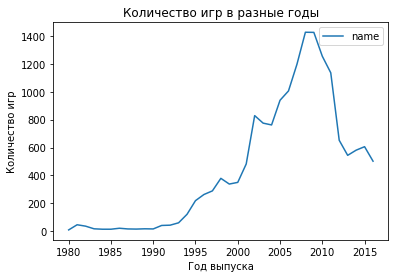

In [34]:
(
    df_games.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
    .sort_values(by=['year_of_release'], ascending=True)
    .plot()
)
plt.title('Количество игр в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод:** До 1995 года выпускалось небольшое количество игр, с 1995 до 2007 количество выпускаемых игр резко начало возрастать, а с 2008 года пошло на спад.

#### Посмотрим, как менялись продажи по платформам

Text(0, 0.5, 'Продажи в млн шт')

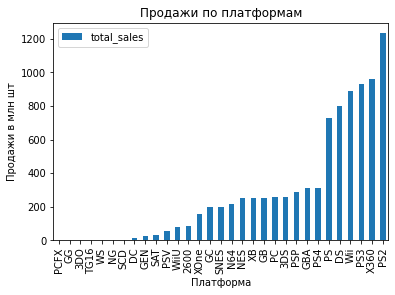

In [35]:
(
    df_games.pivot_table(index=['platform'],
                         values=['total_sales'], 
                         aggfunc='sum')
    .sort_values(by='total_sales', ascending=True)
    .plot(kind='bar'))
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн шт')


**Вывод:** Больше всего выделяются платформы: PS2, X360, PS3, Wii, DS, PS.

Создадим список с выделяющимися платформами и построим по нему график

In [36]:
top_platforms = (df_games.pivot_table(
    index=['platform'],
    values=['total_sales'], 
    aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
               ).head(6)

In [37]:
display(top_platforms)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


Text(0, 0.5, 'Продажи в млн шт')

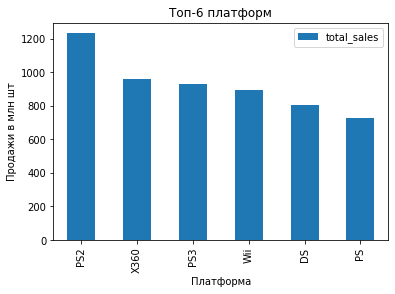

In [38]:
top_platforms.plot(kind='bar')
plt.title('Топ-6 платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи в млн шт')

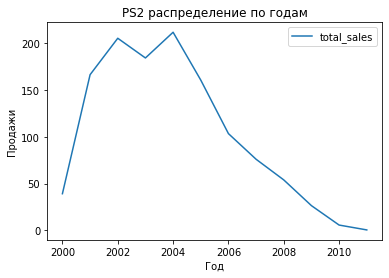

In [39]:
(
    df_games.query('platform == "PS2"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('PS2 распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**PS2**\
На старте, в 2000 году, видим резкий скачок продаж, который слегка упал в 2003 году и достиг пика в 2004. После этого начался спад.

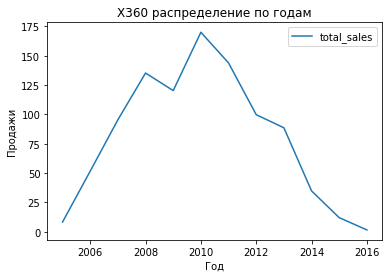

In [40]:
(
    df_games.query('platform == "X360"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('X360 распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**X360**\
Как и с PS2, видим скачок на старте продаж в 2008 году, небольшое падение в 2009, подъем до пика в 2010 и снова спад.

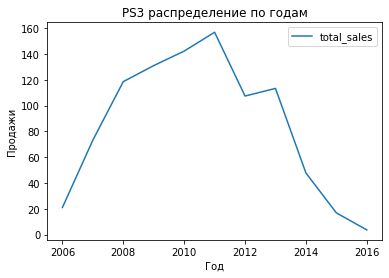

In [41]:
(
    df_games.query('platform == "PS3"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('PS3 распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**PS3**\
Подъем - небольшой спад - подъем - спад, как и в предыдущих, только пик находится на первом подъеме.

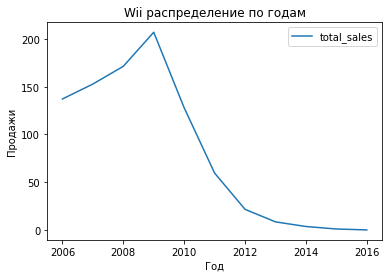

In [42]:
(
    df_games.query('platform == "Wii"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('Wii распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**Wii**\
Тут все проще: со старта продаж достигает пика в 2009 году, после чего спрос равномерно падает.

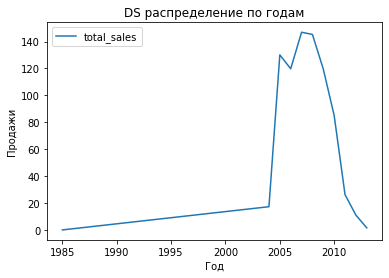

In [43]:
(
    df_games.query('platform == "DS"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('DS распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**DS**\
Вероятно какой-то выброс, но если его не учитывать, то ситуация как и с первыми двумя платформами: подъем, небольшой спад, подъем до пика и окончательное снижение спроса.

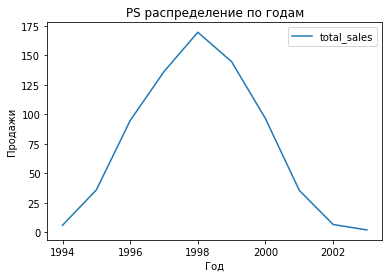

In [44]:
(
    df_games.query('platform == "PS"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('PS распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**PS**\
1994-1998 увеличение спроса, 1998-2002 падение.

**Вывод:**\
На всех платформах наблюдается резкий старт продаж, после чего спрос падает. Очевидно, что это пройденные, ставшие неактуальными, игры или устаревшие модели игровых приставок.

#### Выясним, за какой характерный срок появляются новые и исчезают старые платформы?

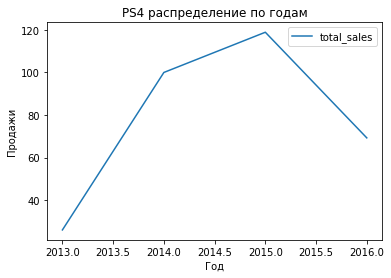

In [45]:
(
    df_games.query('platform == "PS4"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('PS4 распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

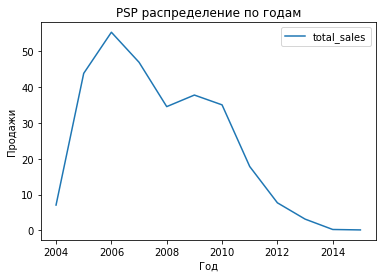

In [46]:
(
    df_games.query('platform == "PSP"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('PSP распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

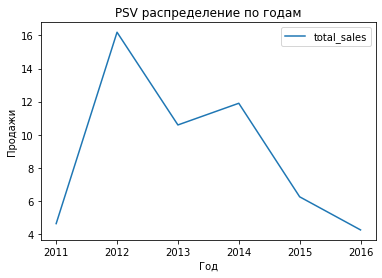

In [47]:
(
    df_games.query('platform == "PSV"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('PSV распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

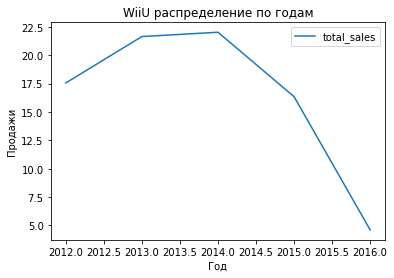

In [48]:
(
    df_games.query('platform == "WiiU"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('WiiU распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

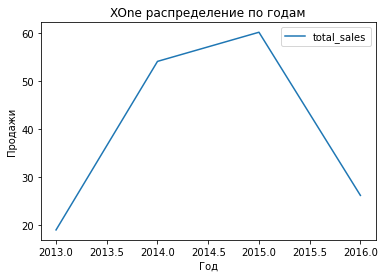

In [49]:
(
    df_games.query('platform == "XOne"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('XOne распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

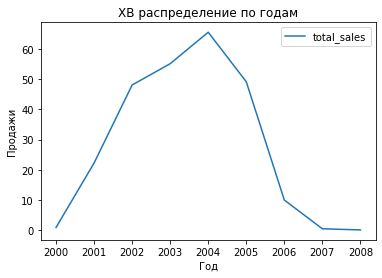

In [50]:
(
    df_games.query('platform == "XB"')
            .pivot_table(
                   index=['year_of_release'],
                   values='total_sales',
                   aggfunc='sum')
    .plot()
)
plt.title('XB распределение по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

**XBox**\
XOne - Вышел в 2013, продажи стихли в 2016\
X360 - Вышел в 2006, продажи стихли в 2014\
XB - Вышел в 2000, а продажи стихли в 2007\
В среднем консоль живет 6 лет.\
**PlayStation**\
PS4 - 2013-2015\
PSV - 2011-2015\
PS3 - 2006-2013\
PSP - 2004-2012\
PS2 - 2000-2008\
PS - 1994-2001\
В среднем консоль живет 6 лет.\
**Wii**\
Wii - 2012-2015\
Wii - 2006-2012


**Вывод:**
1. XBox Выходит примерно каждые 6 лет и столько же длится актуальность каждой игровой консоли.
2. PlayStation игровые консоли выходят так же каждые 6 лет, если не считать PSP и PSV, и актуальны в течении 6 лет.
3. И Wii выходит каждые 6 лет

#### Актуальным периодом возьмем 2013 год
В этот период вышла Wii, на подходе PS4 и Xbox One, а предыдущие модели потеряли актуальность.

 \
Изначально взял 2010 год, но до 2012 старые модели не теряли актуальность и X360 имел больше продаж, чем XOne.

In [51]:
actual_period = df_games.query('year_of_release > 2013')

In [52]:
display(actual_period)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,uncnown,14.63
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,uncnown,11.68
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,uncnown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,uncnown,0.01
16435,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,uncnown,0.01
16438,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,uncnown,0.01
16440,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,uncnown,0.01


In [53]:
actual_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1689 non-null   int64  
 1   name             1689 non-null   object 
 2   platform         1689 non-null   object 
 3   year_of_release  1689 non-null   Int64  
 4   genre            1689 non-null   object 
 5   na_sales         1689 non-null   float64
 6   eu_sales         1689 non-null   float64
 7   jp_sales         1689 non-null   float64
 8   other_sales      1689 non-null   float64
 9   critic_score     1689 non-null   Int64  
 10  user_score       1689 non-null   float64
 11  rating           1689 non-null   object 
 12  total_sales      1689 non-null   float64
dtypes: Int64(2), float64(6), int64(1), object(4)
memory usage: 188.0+ KB


In [54]:
actual_period.describe()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000
mean,9754.900533,2014.953227,0.168182,0.160261,0.055115,0.048324,30.162818,3.008111,0.431883
std,5099.844755,0.799624,0.446134,0.466846,0.211513,0.141790,37.114050,3.978406,1.056109
min,31.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,5285.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,10780.000000,2015.000000,0.020000,0.020000,0.010000,0.010000,-1.000000,3.400000,0.100000
75%,14339.000000,2016.000000,0.120000,0.120000,0.040000,0.040000,71.000000,7.100000,0.350000
max,16714.000000,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


Теперь работаем с данными за этот период.

#### Выясним какие платформы потенциально прибыльные

In [55]:
(
    actual_period.pivot_table(index='platform',
                         values='total_sales',
                         aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [56]:
actual_period_total_sales = actual_period.pivot_table(index=['platform', 'year_of_release'],
                         values='total_sales',
                         aggfunc='sum')
actual_period_total_sales

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2014                    0.24
         2015                    0.12
PSV      2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2014                   54.07
         2015                   60.14
         2016                   26.15

**Вывод:**\
Все платформы с годами теряют свою актуальность, судя по продажам, исключением являются PS4 и XOne,\
Но это новые консоли, у которых спад продаж еще впереди.
Потенциально прибыльными являются PS4 и XOne.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Платформы')

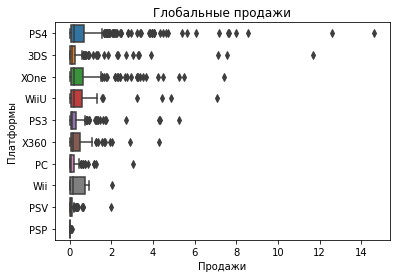

In [57]:
sns.boxplot(data=actual_period.reset_index(), x='total_sales', y='platform')
plt.title('Глобальные продажи')
plt.xlabel('Продажи')
plt.ylabel('Платформы')

Text(0, 0.5, 'Платформы')

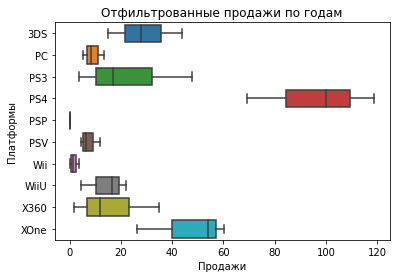

In [58]:
sns.boxplot(data=actual_period_total_sales.reset_index(), x='total_sales', y='platform')
plt.title('Отфильтрованные продажи по годам')
plt.xlabel('Продажи')
plt.ylabel('Платформы')

**Вывод:**\
Описывать сами ящики с усами не буду, данных не так много и можно разобраться по сводной таблице выше, но мы видим как сильно вперед вышла ПС4, на втором месте XBox One и на третьем ПС3. Последние места занимают PSV, Wii и замыкает PSP, прибыль которой настолько мала, что ящик находится где-то около ноля.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

,total_sales,critic_score
total_sales,1.000000,0.402661
critic_score,0.402661,1.000000


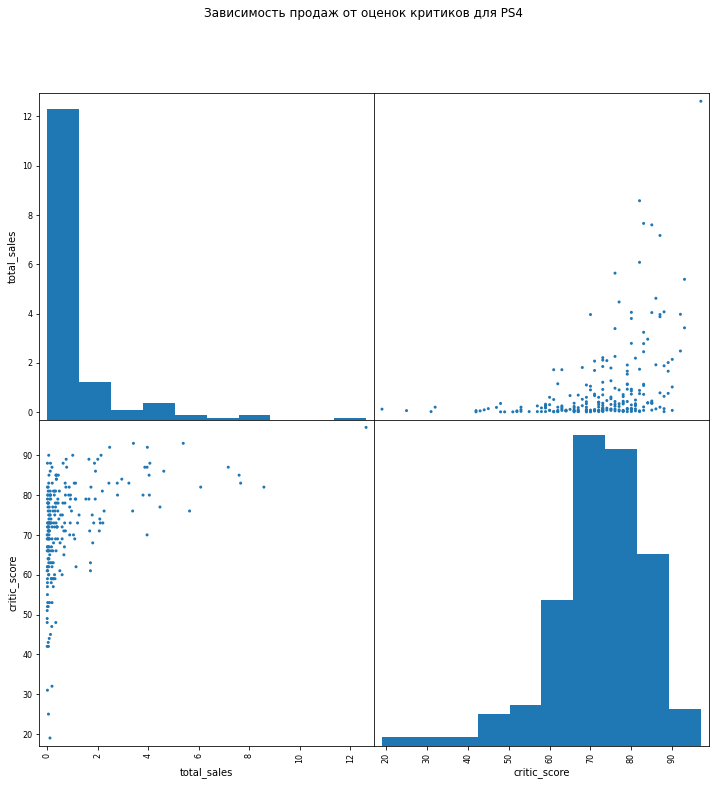

In [59]:
ps4_actual_period = actual_period.query('critic_score >= 0')
ps4_actual_period = ps4_actual_period.query('platform == "PS4"').loc[:, ['total_sales', 'critic_score']]
display(ps4_actual_period.corr())
pd.plotting.scatter_matrix(ps4_actual_period, figsize=(12, 12), alpha=1)
plt.suptitle('Зависимость продаж от оценок критиков для PS4')
plt.show()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


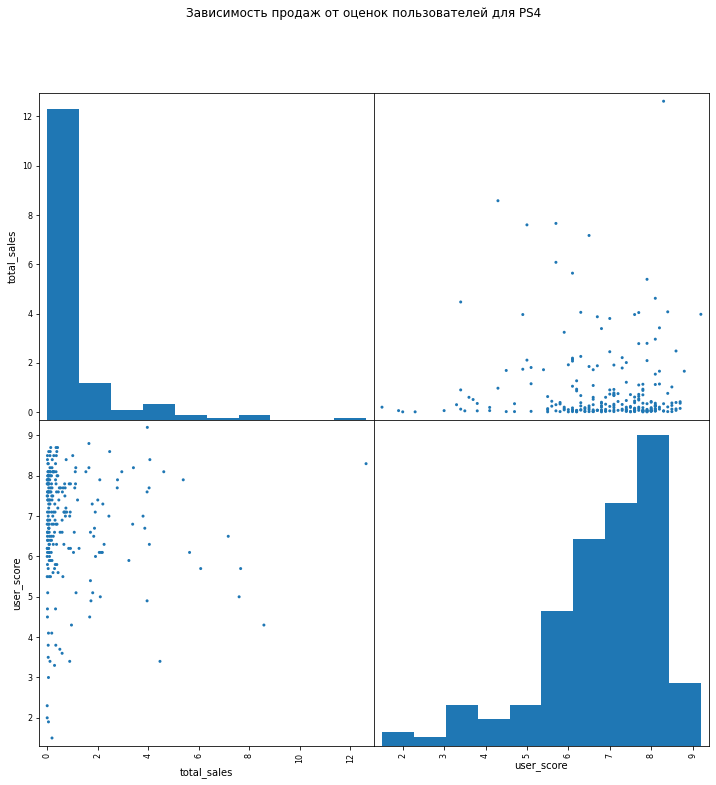

In [60]:
ps4_actual_period = actual_period.query('user_score >= 0')
ps4_actual_period = ps4_actual_period.query('platform == "PS4"').loc[:, ['total_sales', 'user_score']]
display(ps4_actual_period.corr())
pd.plotting.scatter_matrix(ps4_actual_period, figsize=(12, 12), alpha=1,)
plt.suptitle('Зависимость продаж от оценок пользователей для PS4')
plt.show()

,total_sales,critic_score
total_sales,1.000000,0.428677
critic_score,0.428677,1.000000


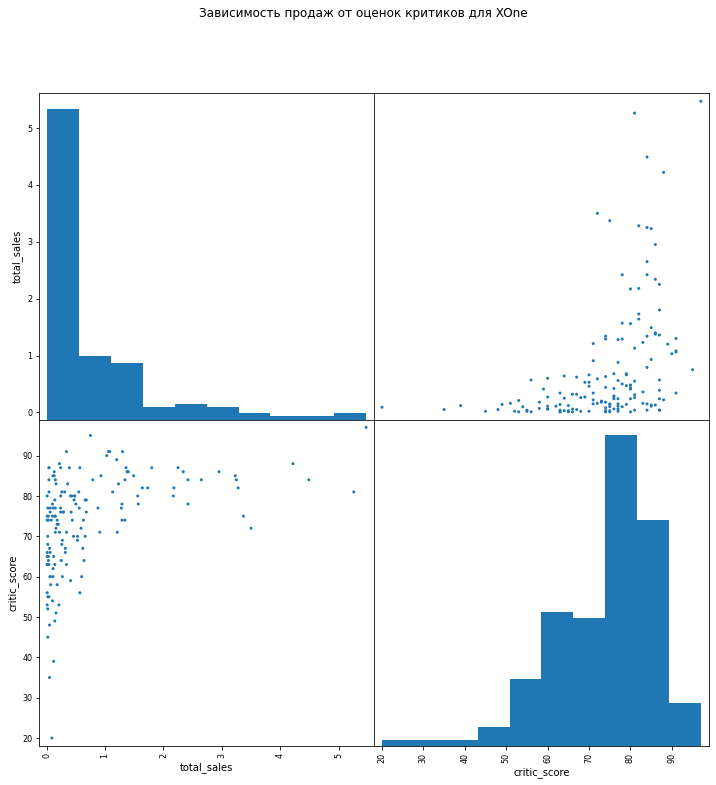

In [61]:
xone_actual_period = actual_period.query('critic_score >= 0')
xone_actual_period = xone_actual_period.query('platform == "XOne"').loc[:, ['total_sales', 'critic_score']]
display(xone_actual_period.corr())
pd.plotting.scatter_matrix(xone_actual_period, figsize=(12, 12), alpha=1,)
plt.suptitle('Зависимость продаж от оценок критиков для XOne')
plt.show()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


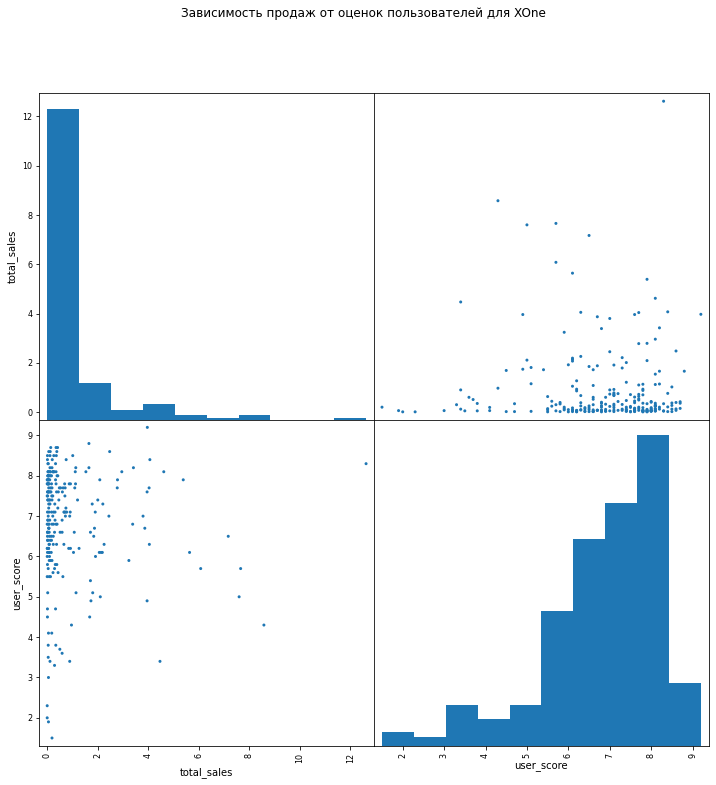

In [62]:
ps4_actual_period = actual_period.query('user_score >= 0')
ps4_actual_period = ps4_actual_period.query('platform == "PS4"').loc[:, ['total_sales', 'user_score']]
display(ps4_actual_period.corr())
pd.plotting.scatter_matrix(ps4_actual_period, figsize=(12, 12), alpha=1,)
plt.suptitle('Зависимость продаж от оценок пользователей для XOne')
plt.show()

,total_sales,critic_score
total_sales,1.000000,0.446575
critic_score,0.446575,1.000000


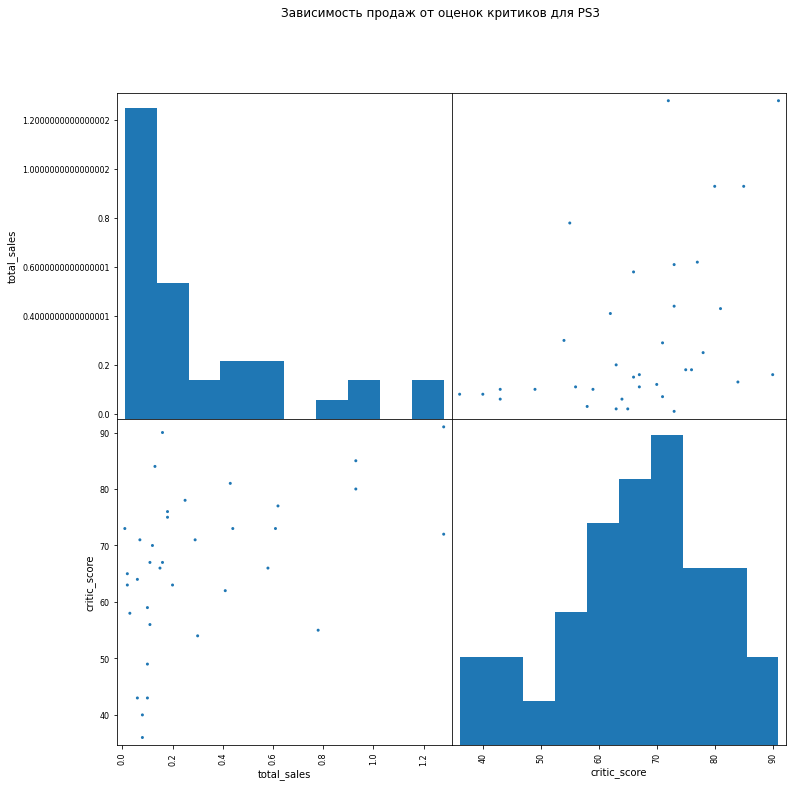

In [63]:
ps3_actual_period = actual_period.query('critic_score >= 0')
ps3_actual_period = ps3_actual_period.query('platform == "PS3"').loc[:, ['total_sales', 'critic_score']]
display(ps3_actual_period.corr())
pd.plotting.scatter_matrix(ps3_actual_period, figsize=(12, 12), alpha=1,)
plt.suptitle('Зависимость продаж от оценок критиков для PS3')
plt.show()

,total_sales,user_score
total_sales,1.000000,-0.040132
user_score,-0.040132,1.000000


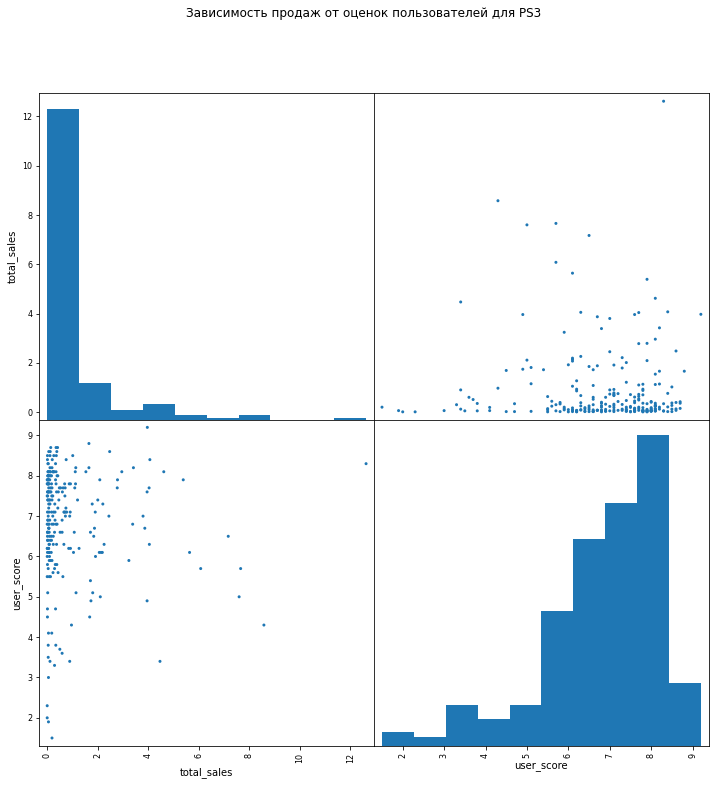

In [64]:
ps4_actual_period = actual_period.query('user_score >= 0')
ps4_actual_period = ps4_actual_period.query('platform == "PS4"').loc[:, ['total_sales', 'user_score']]
display(ps4_actual_period.corr())
pd.plotting.scatter_matrix(ps4_actual_period, figsize=(12, 12), alpha=1,)
plt.suptitle('Зависимость продаж от оценок пользователей для PS3')
plt.show()

In [65]:
# код ревьюера

print(actual_period.query('critic_score >= 0 and user_score >= 0').shape[0])
print(actual_period.query('critic_score >= 0').shape[0])
print(actual_period.query('user_score >= 0').shape[0])


704
718
888


**Вывод:**\
Отзывы пользователей и критиков влияют на продажи. Чем выше рейтинг критиков и пользователей - тем выше продажи.\
Продажи выше, если рейтинг критиков больше 40 или рейтинг пользователей выше 4.

#### Посмотрим на общее распределение игр по жанрам

In [66]:
(actual_period
        .pivot_table(index='genre', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', ascending=False)
)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


In [67]:
(actual_period
        .pivot_table(index='genre', values='total_sales', aggfunc='median')
        .sort_values(by='total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


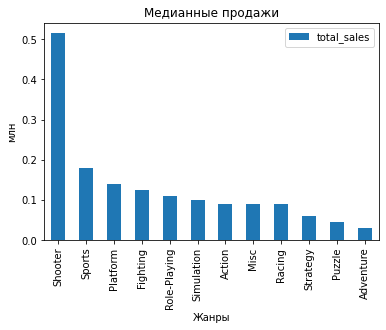

In [68]:
(actual_period
        .pivot_table(index='genre', values='total_sales', aggfunc='median')
        .sort_values(by='total_sales', ascending=False)
        .plot(kind='bar')
)
plt.title('Медианные продажи')
plt.ylabel('млн')
plt.xlabel('Жанры')
plt.show()

In [69]:
(actual_period
        .pivot_table(index='genre', values='total_sales', aggfunc='mean')
        .sort_values(by='total_sales', ascending=False)
)

,total_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


**Вывод:**\
Самым прибыльным жанром является Action. Второе и третье место занимают shooter и sports, соответственно. Самыми неприбыльными жанрами являются симуляции, стратегии и пазлы.\
Но в среднем самым прибыльным жанром является Shooter. Скорее всего Action выбивается вперед за счет количества игр, но Shooter приносит стабильно высокую прибыль.

### Составим портрет пользователя каждого региона

#### NA - Северная Америка

In [70]:
q = (
    actual_period
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(q)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


<AxesSubplot:title={'center':'Доли игровых платформ в регионе NA'}, ylabel='na_sales'>

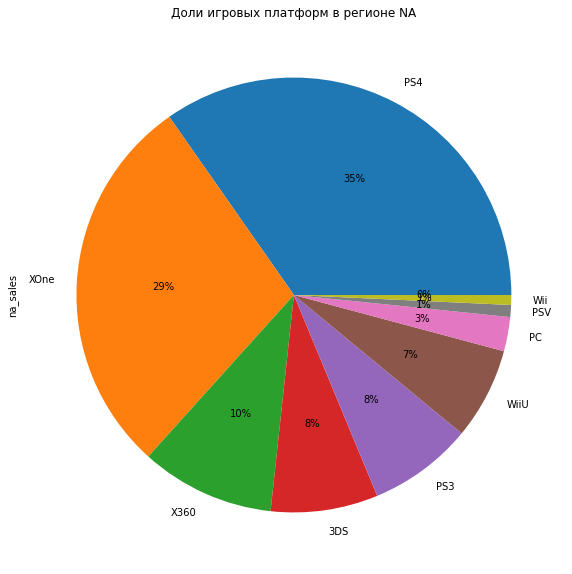

In [71]:
q.plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли игровых платформ в регионе NA', legend=False)

В Северной Америке лидером по прибыли среди платформ является PS4, на втором месте - XOne, на третьем - X360. Игры на PSP вообще не покупают. 

In [72]:
w = (
    actual_period
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
display(w)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.64


<AxesSubplot:title={'center':'Доли жанров игр в регионе NA'}, ylabel='na_sales'>

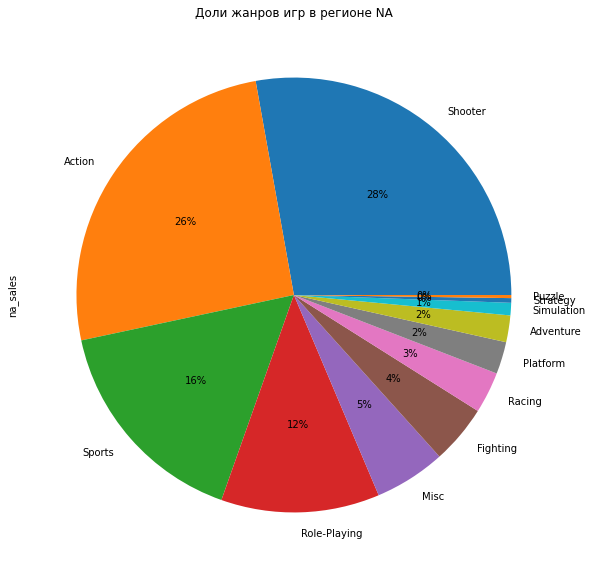

In [73]:
w.plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли жанров игр в регионе NA', legend=False)

Самым прибыльным жанром являются шутеры, далее идет Action и sports. Самыми непопулярными остаются симуляции, стратегии и пазлы.

In [74]:
e = (
    actual_period
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли возрастного рейтинга для игр в регионе NA'}, ylabel='na_sales'>

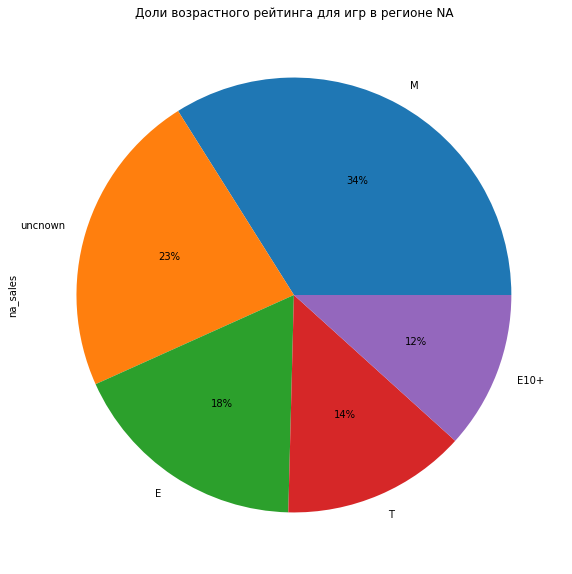

In [75]:
e.plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли возрастного рейтинга для игр в регионе NA', legend=False)

Игры с рейнигом M приносят больше прибыли, чем все остальные

#### EU - Европа

In [76]:
r = (
    actual_period
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли игровых платформ для региона EU'}, ylabel='eu_sales'>

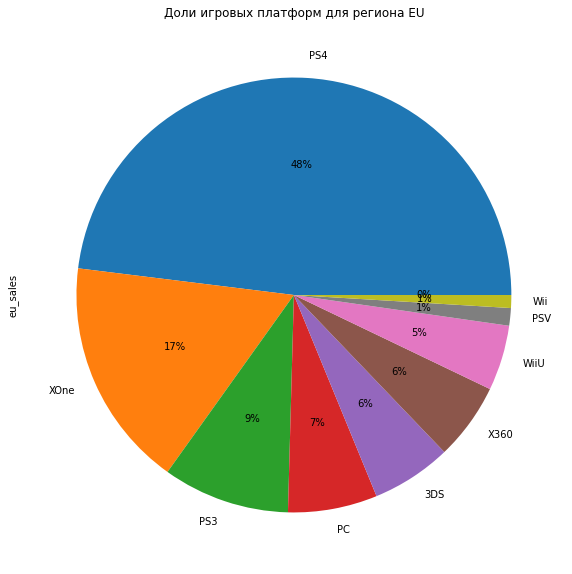

In [77]:
r.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли игровых платформ для региона EU', legend=False)

В Европе первое место так же занимает ПС4. На втором месте - XOne, на третьем PS3. PSV и Wii замыкают список, а PSP вообще не приносит прибыли.

In [78]:
t = (
    actual_period
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли жанров игр для региона EU'}, ylabel='eu_sales'>

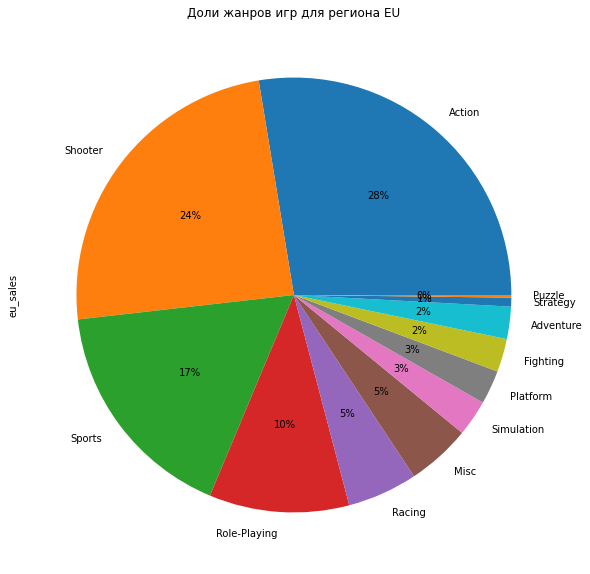

In [79]:
t.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли жанров игр для региона EU', legend=False)

Самым популярным жанром в Европе является Action, самым непопулярным - Puzzle

In [80]:
y = (
    actual_period
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли возрастного рейтинга игр для региона EU'}, ylabel='eu_sales'>

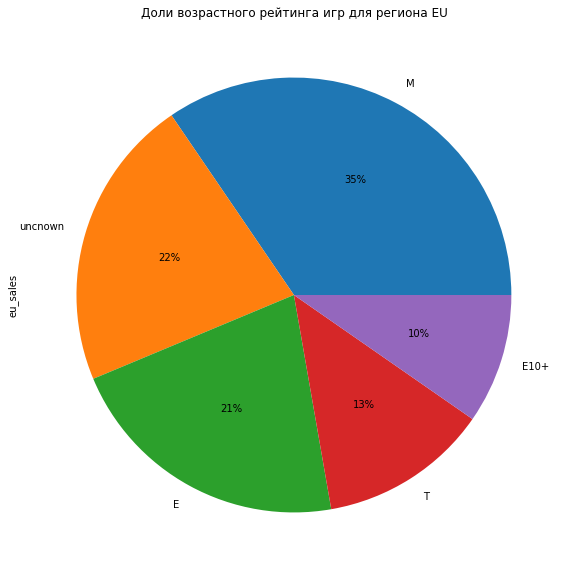

In [81]:
y.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли возрастного рейтинга игр для региона EU', legend=False)

Игры с рейтингом M покупают чаще, ну или тратят на них больше денег.

#### JP - Япония

In [82]:
a = (
    actual_period
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли игровых платформ для региона JP'}, ylabel='jp_sales'>

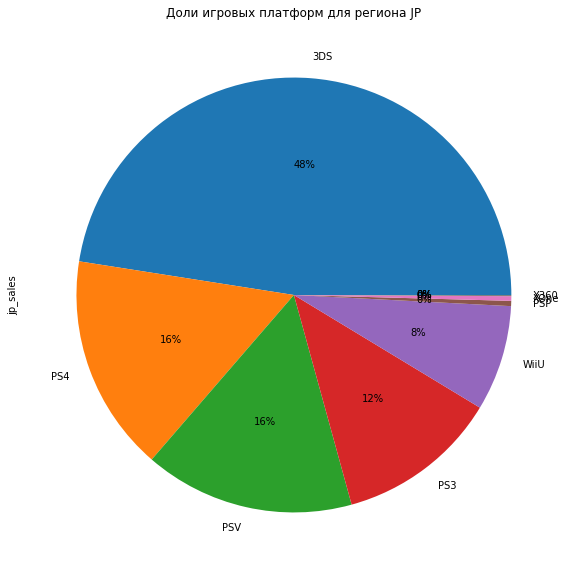

In [83]:
a.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли игровых платформ для региона JP', legend=False)

А вот в Японии лидером продаж является ниндендо, а ПС4 занимает второе место, принеся прибыли в 3 раза меньше, чем ниндендо. PC и Wii вообще не приносят прибыли.

In [84]:
s = (
    actual_period
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли жанров игр для региона JP'}, ylabel='jp_sales'>

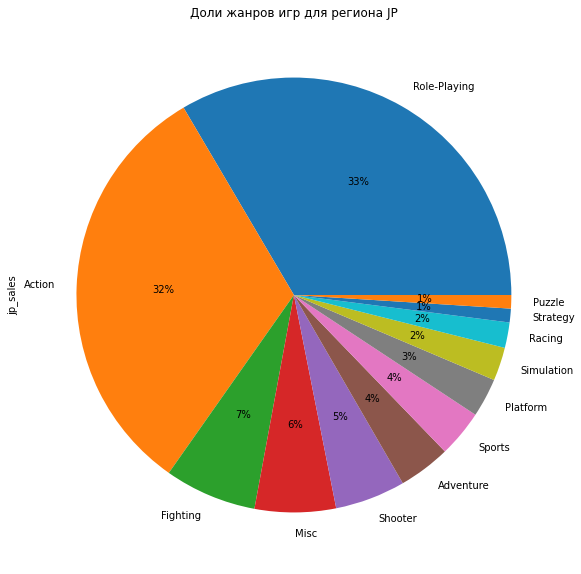

In [85]:
s.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли жанров игр для региона JP', legend=False)

И самым популярным жанром являются ролевые игры, а потом идут экшн игры. Замыкают так же стратегии и пазлы.

In [86]:
d = (
    actual_period
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

<AxesSubplot:title={'center':'Доли возрастного рейтинга игр для региона JP'}, ylabel='jp_sales'>

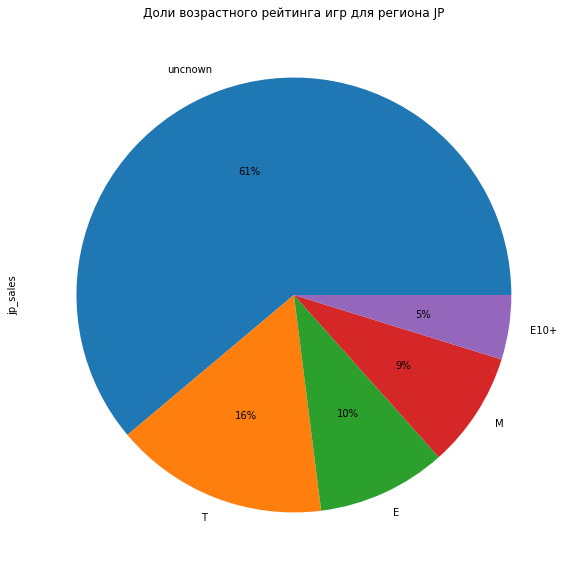

In [87]:
d.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(10, 10), title='Доли возрастного рейтинга игр для региона JP', legend=False)

В Японии игры без рейтинга или с еще неопределенным рейтингом являются лидерами продаж. На втором месте рейтинг T. 

**Вывод:**\
**NA** - Житель Америки предпочитает поиграть в шутеры на PS4 с ретингом M\
**EU** - Жителю Европы также нравится PS4, но играет он в экшн-игры с рейтигом M\
**JP** - В Японии все иначе: японцы предпочитают нинтендо 3DS, ролевые игры и рейтинг для них неважен

In [88]:
# код ревьюера

# Создание сводной таблицы
pivot = actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
# Берем топ-5 
top5 = pivot.nlargest(5, 'na_sales')['na_sales']
# Остальные продажи сохраняем в категорию Other
other = pivot['na_sales'].sum() - top5.sum()
top5['Other'] = other
top5

platform
PS4      98.61
XOne     81.27
X360     28.30
3DS      22.64
PS3      22.05
Other    31.19
Name: na_sales, dtype: float64

### Проверим гипотезы

Зададим alpha = 0.05 и проверим гипотезы методом **ind**

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [89]:
alpha = 0.05

results = st.ttest_ind(
    actual_period.loc[(actual_period['platform'] == 'XOne') & (actual_period['user_score'] > 0)]['user_score'],
    actual_period.loc[(actual_period['platform'] == 'PC') & (actual_period['user_score'] > 0)]['user_score'],
    alternative='greater'
)

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.05225253959674207
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, значит можно предположить, что средние пользовательские рейтинги платформ Xbox One и PC близки по значению.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые\
H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [90]:
alpha = 0.05

results = st.ttest_ind(
    actual_period.loc[(actual_period['genre'] == 'Action') & (actual_period['user_score'] > 0)]['user_score'],
    actual_period.loc[(actual_period['genre'] == 'Sports') & (actual_period['user_score'] > 0)]['user_score'],
    alternative='greater'
)

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4355573992552932e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, значит можно предположить, что средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод:**
1. Пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Пользовательские рейтинги жанров Action и Sports разные.

#### Нулевую и альтернативную гипотезы я сформулировал исходя из формулировки задания. В первом случае осталось все как есть: "... рейтинги одинаковые" - в нулевой гипотеле знак равенства. Во втором случае "...рейтинги разные" - в нулевой гипотезе все равно знак равенства

#### В обоих случаях я воспользовался методом ind, потому что проверяем гипотезу о равенстве средних двух генеральных совокупностей

### Общий вывод:

**1. Мы изучили общую информацию о датасете и выяснили:**
- В датасете 16715 записей
- Отсутствуют дубликаты
- Присутствуют пропущенные значения (22316 пропусков)
- Не во всех столбцах нужный тип данных


**2. Привели названия столбцов к нижнему регистру**


**3. Нашли уникальные значения**


**4. Преобразовали данные в нужные типы**
- critic_score - int
- user_score - float
- year_of_release - int


**5. Нашли уникальные значения столбцов**


**6. Обработали пропуски**
- Удалили или заменили на иные значения 22316 пропусков
- critic_score - заменили пропуски на -1
- user_score - заменили пропуски на -1
- name - удалили строки
- year_of_release - удалили строки
- genre - удалили строки
- rating - заменили пропуски на uncnown


**7. Посчитали суммарные продажи каждой игры во всех регионах и записали их в отдельный столбец**


**8. Посмотрели, сколько игр выпускалось в разные годы**
- Больше всего игр выпускалось в 2008 году - 1427 игр


**9. Посмотрели, как менялись продажи по платформам**
- В топе за все время находятся PS2, X360, PS3, Wii, DS, PS. Платформы располагаются по убыванию
- На каждой платформе наблюдался резкий скачок на старте продаж и последующий спад


**10. Выяснили, за какой характерный срок появляются новые и исчезают старые платформы на примере PS, Xbox и Wii**
- Xbox выходит примерно каждые 6 лет и столько же длится актуальность каждой игровой консоли
- PlayStation выходит так же каждые 6 лет, не считая PSP и PSV, и актуальны в течении 6 лет
- Wii тоже выходит каждые 6 лет


**11. За актуальный период взяли период с 2013 года**


**12. Выяснили какие платформы являются потенциально прибыльными**
- PS4 - 288.15 млн долларов,
- XOne - 140.36 млн долларов,
- 3DS - 86.68 млн долларов
Самым неприбыльным является PSP

**13. Построили график "ящик с усами" по глобальным продажам игр в разбивке по платформам**


**14. Посмотрели, как влияют на продажи отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами**
- Если рейтинг критиков больше 40, то продажи выше
- Если рейтинг пользователей больше 4, то продажи выше


**15. Посмотрели на общее распределение игр по жанрам**
- 1 место - Action 
- 2 место - Shooter
- 3 место - Sports
- 4 место - Role-Playing
- 5 место - Misc
- 6 место - Fighting
- 7 место - Racing
- 8 место - Platform
- 9 место - Adventure
- 10 место - Simulation
- 11 место - Strategy
- 12 место - Puzzle


**16. Составили портрет пользователя каждого региона**
- NA - Житель Америки предпочитает поиграть в шутеры на PS4 с ретингом M
- EU - Жителю Европы также нравится PS4, но играет он в экшн-игры с рейтигом M
- JP - В Японии все иначе: японцы предпочитают нинтендо 3DS, ролевые игры и рейтинг для них неважен


**17. Проверили гипотезы**
- Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC - **ДА**
- Разные ли средние пользовательские рейтинги жанров Action и Sports - **ДА**
